In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
data = yf.download('USDTRY=X', start='2015-01-01', end='2025-05-21')
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,USDTRY=X,USDTRY=X,USDTRY=X,USDTRY=X,USDTRY=X
Date,,,,,
2015-01-01,2.33116,2.33116,2.33116,2.33116,0
2015-01-02,2.33098,2.35700,2.33055,2.33098,0
2015-01-05,2.34224,2.35173,2.32770,2.34224,0
2015-01-06,2.33075,2.33550,2.31560,2.33075,0
2015-01-07,2.32361,2.33165,2.32091,2.32474,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2703 entries, 2015-01-01 to 2025-05-20
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Close, USDTRY=X)   2703 non-null   float64
 1   (High, USDTRY=X)    2703 non-null   float64
 2   (Low, USDTRY=X)     2703 non-null   float64
 3   (Open, USDTRY=X)    2703 non-null   float64
 4   (Volume, USDTRY=X)  2703 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 126.7 KB


In [ ]:
data.tail()

Price,Close,High,Low,Open,Volume
Ticker,USDTRY=X,USDTRY=X,USDTRY=X,USDTRY=X,USDTRY=X
Date,,,,,
2025-05-14,38.758480,38.806099,38.722290,38.758480,0
2025-05-15,38.767700,38.784000,38.664501,38.767700,0
2025-05-16,38.836201,38.857700,38.749378,38.836201,0
2025-05-19,38.856300,38.861198,38.768799,38.856300,0
2025-05-20,38.846100,38.868011,38.766171,38.846100,0


In [ ]:
price = data[["Close"]].copy()
price.head()

Price,Close
Ticker,USDTRY=X
Date,
2015-01-01,2.33116
2015-01-02,2.33098
2015-01-05,2.34224
2015-01-06,2.33075
2015-01-07,2.32361


In [ ]:
lag_num = 10
for i in range(1, lag_num + 1):
    price[f'lag_{i}'] = price['Close'].shift(i)

In [ ]:
price

Price,Close,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10
Ticker,USDTRY=X,,,,,,,,,,
Date,,,,,,,,,,,
2015-01-01,2.331160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,2.330980,2.331160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,2.342240,2.330980,2.331160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,2.330750,2.342240,2.330980,2.331160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,2.323610,2.330750,2.342240,2.330980,2.331160,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2025-05-14,38.758480,38.789902,38.740200,38.724499,38.644100,38.632900,38.610500,38.571770,38.558399,38.501720,38.499401
2025-05-15,38.767700,38.758480,38.789902,38.740200,38.724499,38.644100,38.632900,38.610500,38.571770,38.558399,38.501720


In [ ]:
price.dropna(inplace=True)
price.head()

Price,Close,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10
Ticker,USDTRY=X,,,,,,,,,,
Date,,,,,,,,,,,
2015-01-15,2.28122,2.28237,2.28427,2.29277,2.29820,2.31757,2.32361,2.33075,2.34224,2.33098,2.33116
2015-01-16,2.30532,2.28122,2.28237,2.28427,2.29277,2.29820,2.31757,2.32361,2.33075,2.34224,2.33098
2015-01-19,2.33097,2.30532,2.28122,2.28237,2.28427,2.29277,2.29820,2.31757,2.32361,2.33075,2.34224
2015-01-20,2.33186,2.33097,2.30532,2.28122,2.28237,2.28427,2.29277,2.29820,2.31757,2.32361,2.33075
2015-01-21,2.34546,2.33186,2.33097,2.30532,2.28122,2.28237,2.28427,2.29277,2.29820,2.31757,2.32361


In [ ]:
y = price['Close']
x = price.drop('Close', axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Decision Tree Regressor Method

In [ ]:
dtr_model = DecisionTreeRegressor(random_state=42, max_depth=7)
dtr_model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=7, random_state=42)

In [ ]:
y_pred_train = dtr_model.predict(x_train)
y_pred_test = dtr_model.predict(x_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

percentage_error_test = np.abs((y_test.values.ravel() - y_pred_test) / y_test.values.ravel())
accuracy_5_test = np.mean(percentage_error_test <= 0.05)
accuracy_1_test = np.mean(percentage_error_test <= 0.01)


print(f"Training MSE: {mse_train:.4f} | Testing MSE: {mse_test:.4f}")
print(f"Training RMSE: {rmse_train:.4f} | Testing RMSE: {rmse_test:.4f}")
print(f"Training R²: {r2_train:.4f} | Testing R²: {r2_test:.4f}")
print(f"Accuracy 5%: {accuracy_5_test}")
print(f"Accuracy 1%: {accuracy_1_test}")

Training MSE: 0.0075 | Testing MSE: 0.0433
Training RMSE: 0.0866 | Testing RMSE: 0.2082
Training R²: 0.9999 | Testing R²: 0.9996
Accuracy 5%: 0.987012987012987
Accuracy 1%: 0.6846011131725418


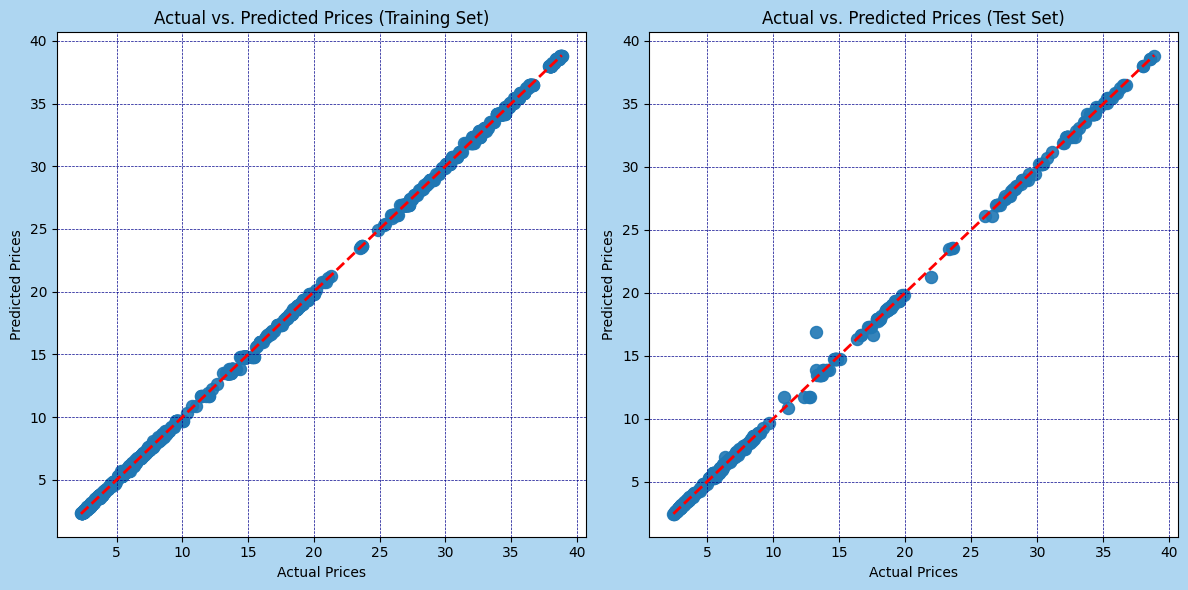

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), facecolor='#AED6F1')

axes[0].scatter(y_train, y_pred_train, alpha=0.9, s=75)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0].set_title('Actual vs. Predicted Prices (Training Set)')
axes[0].set_xlabel('Actual Prices')
axes[0].set_ylabel('Predicted Prices')
axes[0].grid(color='darkblue', lw=0.5, linestyle='--')

axes[1].scatter(y_test, y_pred_test, alpha=0.9, s=75)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_title('Actual vs. Predicted Prices (Test Set)')
axes[1].set_xlabel('Actual Prices')
axes[1].set_ylabel('Predicted Prices')
axes[1].grid(color='darkblue', lw=0.5, linestyle='--')

plt.tight_layout()
plt.show()

# Randon Forest Regressor Method

In [ ]:
rfr_model = RandomForestRegressor(random_state=42, n_estimators=1000)
rfr_model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=1000, random_state=42)

In [ ]:
y_pred_train = rfr_model.predict(x_train)
y_pred_test = rfr_model.predict(x_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

percentage_error_test = np.abs((y_test.values.ravel() - y_pred_test) / y_test.values.ravel())
accuracy_5_test = np.mean(percentage_error_test <= 0.05)
accuracy_1_test = np.mean(percentage_error_test <= 0.01)

print(f"Training MSE: {mse_train:.4f} | Testing MSE: {mse_test:.4f}")
print(f"Training RMSE: {rmse_train:.4f} | Testing RMSE: {rmse_test:.4f}")
print(f"Training R²: {r2_train:.4f} | Testing R²: {r2_test:.4f}")
print(f"Accuracy 5%: {accuracy_5_test}")
print(f"Accuracy 1%: {accuracy_1_test}")

Training MSE: 0.0029 | Testing MSE: 0.0176
Training RMSE: 0.0538 | Testing RMSE: 0.1326
Training R²: 1.0000 | Testing R²: 0.9998
Accuracy 5%: 0.9925788497217068
Accuracy 1%: 0.7959183673469388


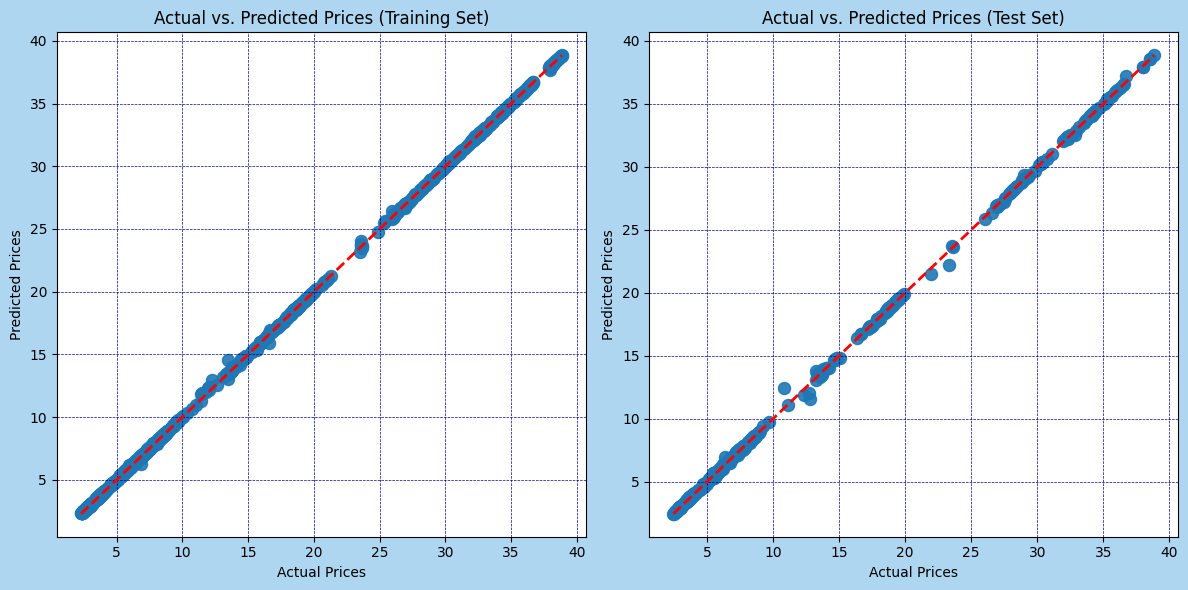

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), facecolor='#AED6F1')

axes[0].scatter(y_train, y_pred_train, alpha=0.9, s=75)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0].set_title('Actual vs. Predicted Prices (Training Set)')
axes[0].set_xlabel('Actual Prices')
axes[0].set_ylabel('Predicted Prices')
axes[0].grid(color='darkblue', lw=0.5, linestyle='--')

axes[1].scatter(y_test, y_pred_test, alpha=0.9, s=75)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_title('Actual vs. Predicted Prices (Test Set)')
axes[1].set_xlabel('Actual Prices')
axes[1].set_ylabel('Predicted Prices')
axes[1].grid(color='darkblue', lw=0.5, linestyle='--')

plt.tight_layout()
plt.show()

In [ ]:
Neural_Network_Model= MLPRegressor(random_state=42,
                                   max_iter=5000,
                                   learning_rate_init=0.0001,
                                   hidden_layer_sizes=(100,5))

Neural_Network_Model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(hidden_layer_sizes=(100, 5), learning_rate_init=0.0001,
             max_iter=5000, random_state=42)

In [ ]:
y_pred_train = Neural_Network_Model.predict(x_train)
y_pred_test = Neural_Network_Model.predict(x_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

percentage_error_test = np.abs((y_test.values.ravel() - y_pred_test) / y_test.values.ravel())
accuracy_5_test = np.mean(percentage_error_test <= 0.05)
accuracy_1_test = np.mean(percentage_error_test <= 0.01)

print(f"Training MSE: {mse_train:.4f} | Testing MSE: {mse_test:.4f}")
print(f"Training RMSE: {rmse_train:.4f} | Testing RMSE: {rmse_test:.4f}")
print(f"Training R²: {r2_train:.4f} | Testing R²: {r2_test:.4f}")
print(f"Accuracy 5%: {accuracy_5_test}")
print(f"Accuracy 1%: {accuracy_1_test}")

Training MSE: 0.0352 | Testing MSE: 0.0519
Training RMSE: 0.1875 | Testing RMSE: 0.2277
Training R²: 0.9997 | Testing R²: 0.9995
Accuracy 5%: 0.9777365491651205
Accuracy 1%: 0.6437847866419295


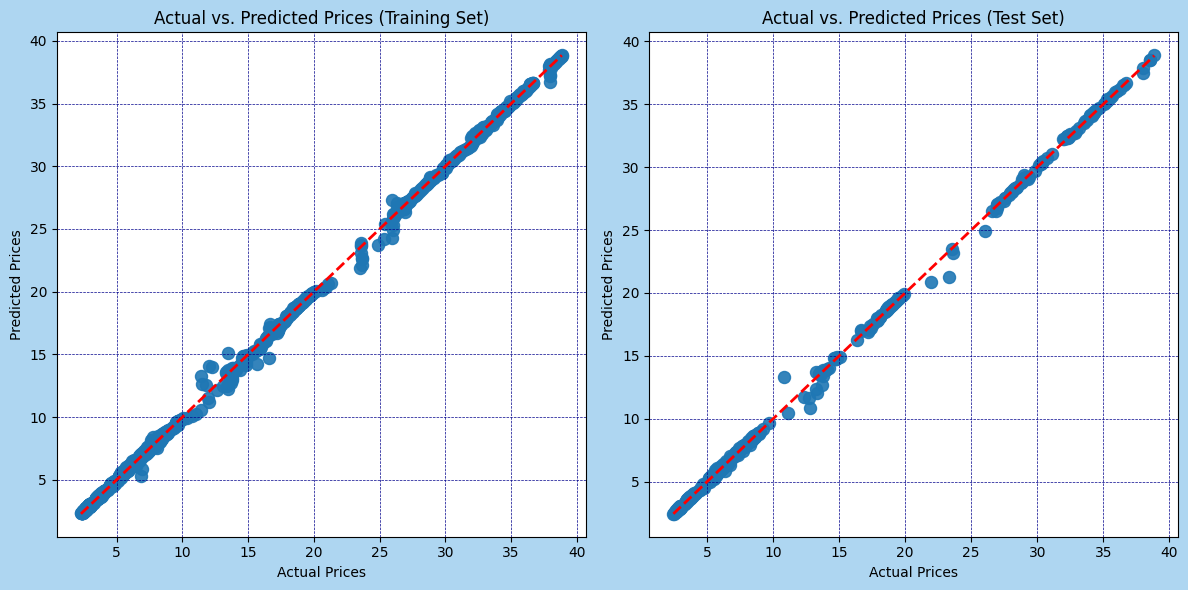

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), facecolor='#AED6F1')

axes[0].scatter(y_train, y_pred_train, alpha=0.9, s=75)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0].set_title('Actual vs. Predicted Prices (Training Set)')
axes[0].set_xlabel('Actual Prices')
axes[0].set_ylabel('Predicted Prices')
axes[0].grid(color='darkblue', lw=0.5, linestyle='--')

axes[1].scatter(y_test, y_pred_test, alpha=0.9, s=75)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_title('Actual vs. Predicted Prices (Test Set)')
axes[1].set_xlabel('Actual Prices')
axes[1].set_ylabel('Predicted Prices')
axes[1].grid(color='darkblue', lw=0.5, linestyle='--')

plt.tight_layout()
plt.show()

# The Prediction for the Future

In [ ]:
current_price = price.iloc[-1][0:10]

current_price = current_price.values.reshape(1, -1)

predicted_price = rfr_model.predict(current_price)

print(f"Predicted Price: {predicted_price}")

Predicted Price: [38.83833151]


In [ ]:
real_data = yf.download('USDTRY=X', start='2025-05-21', end='2025-05-22')
real_data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,USDTRY=X,USDTRY=X,USDTRY=X,USDTRY=X,USDTRY=X
Date,,,,,
2025-05-21,38.8353,38.887299,38.76585,38.8353,0
